
---
<big><big><big><big><big><big>Metody uczenia maszynowego</big></big></big></big></big></big>

---





---
<big><big><big><big><big>Problem klasyfikacji Bayesowsko</big></big></big></big></big>

---



---

<id=tocheading><big><big><big><big>Spis treści</big></big></big></big>
<div id="toc"></div>

---

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
# -*- coding: utf-8 -*-

import numpy as np
np.set_printoptions(precision=3)
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

plt.style.use("fivethirtyeight")

from bokeh.io import gridplot, output_file, show
from bokeh.plotting import figure, output_notebook
from bkcharts import Scatter

In [3]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import Perceptron, LinearRegression, LogisticRegression
from sklearn.preprocessing import scale

In [4]:
from sklearn.datasets import make_circles, make_classification, make_hastie_10_2, make_moons
from sklearn.datasets import make_multilabel_classification, make_blobs
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from matplotlib.colors import ListedColormap


In [5]:
output_notebook()
sns.set(font_scale=2.0)

Loading BokehJS ...

Image inclusion
<img src="../mum_figures/" width="100%">

# Zadanie klasyfikacji
1. __K__ klas $c_k; k=1,\dots,K$
  * __rozłączne__ zwykle
  * __klasyfikacja wieloklasowa__ gdy $K>2$ (_ang._ multi-class)
  * __wielo etykietowa__ gdy klasy _nie są_ rozłączne (_ang._ multi label)
2. __brak wiedzy__ o klasach
  * wygodna reprezentacja $$y=(0,\dots,0,1,0,\dots,0)$$
  gdzie $y_k=1$
3. __notacja__ (starałem się nie pomylić, ale jeśli...)
  * $c_k$ k-ta klasa,  $c_k\in C_k$
  * $y_k$ k-ty przykład
  * $\widehat{y}_k$ wartość na pozycji k-tej wektora $\widehat{y}$

# Podejścia
1. __dyskryminatywne__ $$\widehat{y}(x)=(0,\dots,0,1,0,\dots,0)$$ jeśli odpowiedzią jest, że $x$ należy do klasy $k$
2. __probabilistyczne__ zwracają __szanse__ przynależenia do klas
  1. modeluje rozkłady parametryczne $$P(C_k\mid X)$$ i optymalizuje je na podstawie zbioru uczącego
  2. __bayesowski__ $$P(y_k\mid x)=\frac{p(x\mid y=c_k)\,p(c_k)}{p(x)}$$ z _likelihood_ $p(x\mid y=c_k)$ i _priorem_ $p(y=c_k)$

# Uogólnione modele liniowe (generalized linear models)
1. __liniowy__ $$y(x)=\theta^Tx+\theta_0$$
2. __prawdopodobieństwo__ ma należeć do $[0, 1]$
3. __płaszczyzna decyzyjna__ $y(x)=0$
4. __uogólniony liniowy__ $$y(x)=\sigma(\theta^Tx+\theta_0)$$
  * __nieliniowa__ $\sigma()$
    * __funkcja aktywacji__ w ML
  * model __nie jest już__ liniowy ze względu na parametry

## Funkcja dyskryminatywna
1. funkcja __dyskryminatywna__ $$\widehat{y}=g(x)=f(y\mid x)$$  daje najlepszą prawdopodobną klasyfikację $x$
$$\begin{align}
g(x)=f(y\mid x)&=\int yp(y\mid x)dy\\
&=1\cdot p(y=1\mid x)+0\cdot p(y=0\mid x)\\&=p(y=1\mid x)
\end{align}$$
  * $g(x)$ rozpoznaje klasę $1$
2. z __reguły Bayesa__
$$\begin{align}
g(x)=p(y=c_1\mid x)&=\frac{p(x_i\mid c_k)\,p(c_k)}{\sum_l p(x_i\mid c_l)\,p(c_l)}\\
&=\frac{p(x\mid y=c_1)\,p(y=c_1)}{p(x\mid y=c_1)\,p(y=c_1)+p(x\mid y=c_0)\,p(y=c_0)}\\
&=\frac{\pi_1 p(x\mid y=c_1)}{\pi_1 p(x\mid y=c_1)+\pi_0 p(x\mid y=c_0)}\\
&=\frac{\pi_1 p_1(x)}{\pi_1 p_1(x)+\pi_0 p_0(x)}
\end{align}$$
gdzie $\pi_i=p(y=c_i)$ __prior__ klasy
  * _prior_ klasy może być obliczony ze zbioru uczącego

# Modele probabilistyczne

## Regresja logistyczna
1. __kroki__ modelowania prawdopodobieństwa 
  1. __warunkowego__ $p(x\mid c_k)$
  2. __priorów__ $p(c_k)$
  3. __posteriorów__ $p(y=c_k\mid x)$
2. __przypadek__ $K=2$
  1. __posterior__ z reguły Bayesa 
  $$\begin{align}
  p(c_1\mid x)&=\frac{p(x\mid c_1)\,p(c_1)}{p(x\mid c_1)\,p(c_1)+p(x\mid c_2)\,p(c_2)}\\\\
&=\frac{\frac{p(x\mid c_1)\,p(c_1)}{p(x\mid c_1)\,p(c_1)}}{\frac{p(x\mid c_1)\,p(c_1)}{p(x\mid c_1)\,p(c_1)}+\frac{p(x\mid c_2)\,p(c_2)}{p(x\mid c_1)\,p(c_1)}}\\
&=\frac{1}{1+\frac{p(x\mid c_2)\,p(c_2)}{p(x\mid c_1)\,p(c_1)}}\\
&=\frac{1}{1+\exp\left[-\ln\left(\frac{p(x\mid c_1)\,p(c_1)}{p(x\mid c_2)\,p(c_2)}\right)\right]}\\
&=\frac{1}{1+\exp(-z)}=\sigma(z)
\end{align}$$
gdzie $$z=\ln\left(\frac{p(x\mid c_1)\,p(c_1)}{p(x\mid c_2)\,p(c_2)}\right)$$
  * $\sigma(z)$ jest funkcją __sigmoidalną__ (_logistyczną_)
3. \sigma(z) jest _antysymetryczna $$\sigma(-z)=1-\sigma(z)$$
3. __logit__ funkcja
$$\begin{align}
\sigma(-z)&=1-\sigma(z)\\
1/\sigma(-z)&=1+\exp(z)\\
\exp(z)&=\frac{1}{\sigma(-z)}-1=\frac{1-\sigma(-z)}{\sigma(-z)}=\frac{\sigma(z)}{1-\sigma(z)}\\
z&=\ln\left[\frac{\sigma(z)}{1-\sigma(z)}\right]\\\\
\end{align}$$
odpowiada __logarytmowi stosunków prawdopodobieństw__
$$z=\ln\left[\frac{p(y_1\mid x)}{1-p(y_1\mid x)}\right]=\ln\left[\frac{p(y_1\mid x)}{p(y_2\mid x)}\right]$$
  * także __log odds__
5. __przypadek $K>2$__
  * z reguły Bayesa
  $$\begin{align}
  p(c_k\mid x)&=\frac{p(x\mid c_k)\,p(c_k)}{\sum_ip(x\mid c_i)\,p(c_i)}\\\\
&=\frac{\exp(z_k)}{\sum_i\exp(z_i)} 
  \end{align}$$
  zwana funkcją __softmax__
    * __normalizowane__
    * ___wygładzona___ funkcja _max_ dla wyboru
6. __nazwa__ pochodzi z metod statystycznych

In [6]:
def logistic(n_samples=100, centers=2, penalty='l2',
                   odds='odds'):
    #if len(priors) != centers:
    #    centers = max(centers, len(priors))
    #    #return 'Number of centers and length of priors differ!'
    #priors = np.array(priors) / np.sum(priors)
    X, y = make_blobs(n_samples=n_samples, centers=centers)
    n_jobs=3
    cls = LogisticRegression(penalty=penalty, solver='newton-cg', 
                             multi_class='multinomial', n_jobs=n_jobs)
    cls.fit(X, y)
    
    fig_lines = (centers + 2) // 2
    fig, ax = plt.subplots(fig_lines, 2, figsize=(12, fig_lines * 6))
    cmap = plt.cm.gist_rainbow
    
    h=0.025
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = cls.predict(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape)
    
    colors = sns.color_palette("Accent", centers)
    ax[0, 0].pcolormesh(xx, yy, Z, cmap=cmap)
    ax[0, 0].scatter(X[:, 0], X[:, 1], c=[colors[yy] for yy in y], 
                     edgecolors='k', cmap=cmap, s=40)
    ax[0, 0].set_xlim(xx.min(), xx.max())
    ax[0, 0].set_ylim(yy.min(), yy.max())
    ax[0, 0].set_xticks(())
    ax[0, 0].set_yticks(())
    
    # odds lub log-odds dla poszczegolnych klas
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    for n in range(centers):
        if odds == 'odds':
            Z = cls.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, n]
        elif odds == 'log':
            Z = cls.predict_log_proba(np.c_[xx.ravel(), yy.ravel()])[:, n]
        Z = Z.reshape(xx.shape)
        row = (n + 1) // 2; col = (n + 1) % 2
        ax[row, col].pcolormesh(xx, yy, Z, cmap=cmap)
        ax[row, col].scatter(X[:, 0], X[:, 1], c=[colors[yy] for yy in y], 
                             edgecolors='k', cmap=cmap, s=40)
        ax[row, col].set_xlim(xx.min(), xx.max())
        ax[row, col].set_ylim(yy.min(), yy.max())
        ax[row, col].set_xticks(())
        ax[row, col].set_yticks(())
    
    plt.tight_layout()

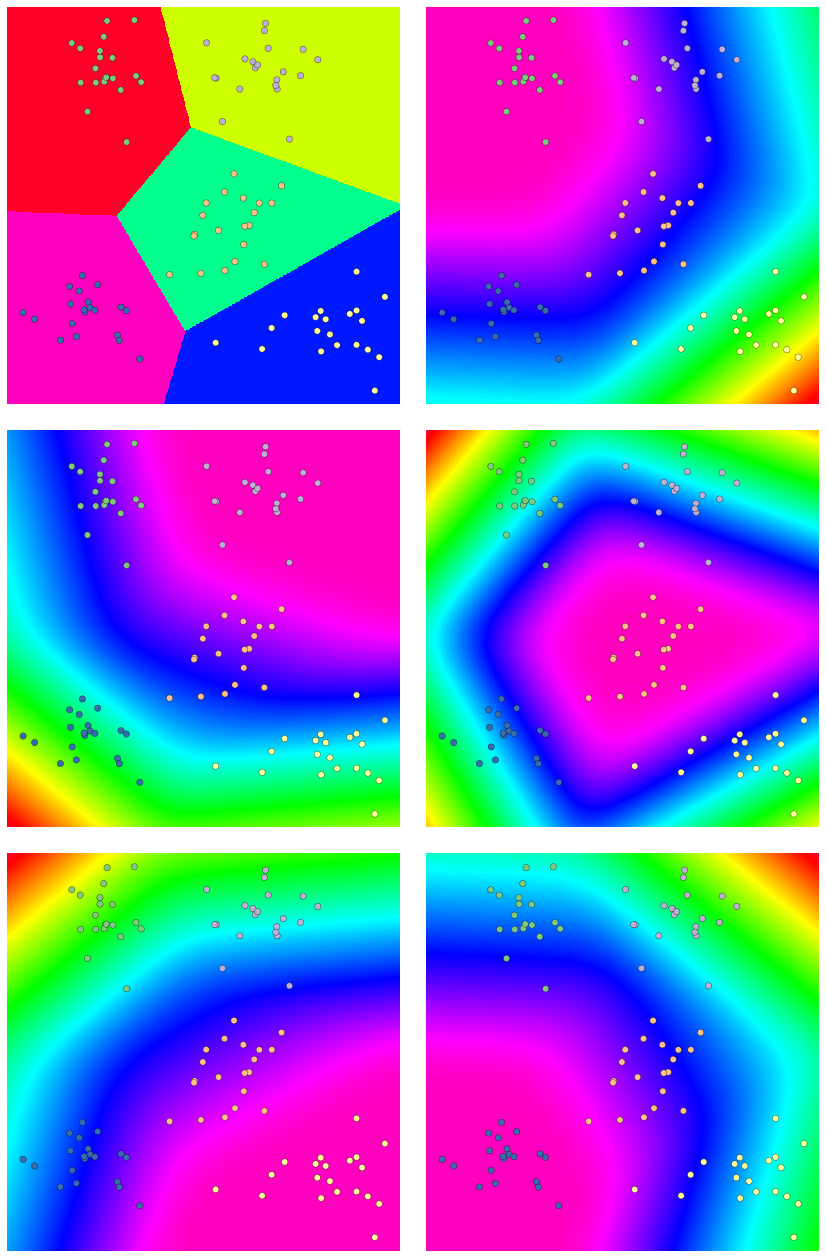

In [7]:
logistic(centers=5, odds='log', penalty='l2')

In [10]:
def plot_logit():
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))
    x = np.linspace(0.00001, 0.99999, 1000)
    y = np.log(x / (1 - x))
    ax.plot(x, y, lw=2, label=r"$\ln\left(\frac{\sigma}{1-\sigma}\right)$")
    ax.legend(loc='best')

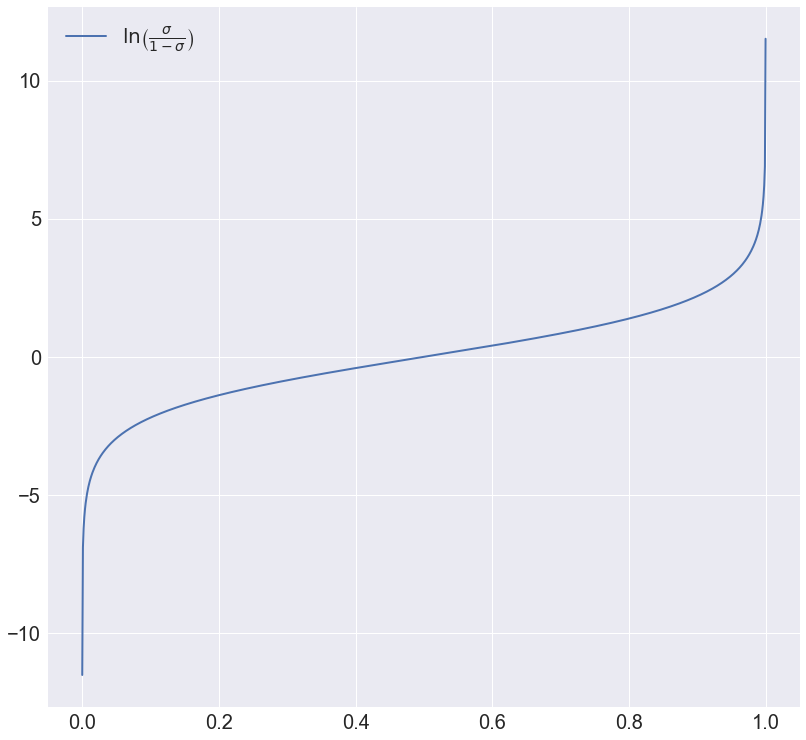

In [11]:
plot_logit()

## Maximum likelihood dla rozkładu gausowskiego atrybutów
1. $K=2$, gausowskie rozkłady $p(x\mid c_i)=\mathcal{N}(x\mid, \mu_i,\sigma^2)$ ze wzpółdzieloną wariancją (macierzą kowariancji)
$$p(x_n,c_1)p(c_1)p(x_n\mid c_1)=\pi\mathcal{N}(x\mid, \mu_1,\sigma^2)$$
  * $\pi=p(C_1)$
2. __notacja__
  * $y_n=1$ oznacza, że $y_n\in C_1$
  * $y_n=0$ oznacza, że $y_n\in C_2$
2. __likelihood__
$$p(Y,X\mid \pi,\mu_1,\mu_2,\sigma)=\prod_{n=1}^N\left[\pi\mathcal{N}(x\mid, \mu_1,\sigma^2)\right]^{y_n} \left[(1-\pi)\mathcal{N}(x\mid, \mu_2,\sigma^2)\right]^{1-y_n}$$
  * notacja determinuje wartość w całkowitym iloczynie
3. __log likelihood__ dla szukania $\pi$
$$\sum_{n=1}^N y_n\ln\pi+(1-y_n)\ln(1-\pi)$$
  * optymalnym $\pi$ jest _estymacja_ ze zbioru uczącego
4. __log likelihood__ dla średnich $\mu_1$
$$\sum_{n=1}^Ny_n\ln\mathcal{N}(x_n\mid \mu_1)=-\frac{1}{2\sigma}\sum_{n=1}^Ny_n(x_n-\mu_1)(x_n-\mu_1)$$
  * rozwiązanie dla $\mu_1$ $$\mu_1=\frac{1}{\left|\{y_n=c_1\}\right|}\sum_{n=1}^Ny_nx_n=\frac{1}{\left|\{y_n=c_1\}\right|}\sum_{x_n:y_n\in C_1}^Nx_n$$
  * analogicznie dla $\mu_2$ $$\mu_2=\frac{1}{\left|\{y_n=c_2\}\right|}\sum_{n=1}^N(1-y_n)x_n=\frac{1}{\left|\{y_n=c_2\}\right|}\sum_{x_n:y_n\in C_2}^Nx_n$$
4. analogicznie macierz kowariancji
5. __rozszerzalne__ dla $K>2$
6. __nieodporne__ na wartości odstające (outliers)
7. __duża liczba parametrów__
  * $2 D$ parametrów średnich (dla $K=2$)
  * $D(D+1)/2$ parametrów macierzy kowariancji
  * $D+1$ wartości priora $p(C_1)$
  * kwadratowa zależność od $D$
  * model regresji logistycznej ma __mniej_ parametrów

In [14]:
def plot_bayes(to_draw=100, mu=[-3.0, +4.0], s = [1.10, 3.26], pi=[2, 5]):
    fig, ax = plt.subplots(1, 1, figsize=(13, 6))
    if mu[0] > mu[1]:
        tmp = mu[0]; mu[0] = mu[1]; mu[1] = tmp
        tmp = s[0]; s[0] = s[1]; s[1] = tmp
        tmp = pi[0]; pi[0] = pi[1]; pi[1] = tmp
    left = min(mu[0] - 4 * s[0], mu[1] - 4 * s[1]) 
    right = max(mu[0] + 4 * s[0], mu[1] + 4 * s[1])
    step = 0.01
    x = np.arange(left, right, step)
    colors = sns.color_palette("Paired", 8)
    y = [0, 0]
    max_val = 0
    pi = np.array(pi)
    pi = pi / np.sum(pi)
    for i in [0, 1]:
        y[i] = pi[i] * np.exp(-((x - mu[i]) ** 2) / (2 * s[i] ** 2)) / (np.sqrt(2 * np.pi) * s[i])
        mx = pi[i] * np.exp(-((mu[i] - mu[i]) ** 2) / (2 * s[i] ** 2)) / (np.sqrt(2 * np.pi) * s[i])
        if mx > max_val:
            max_val = mx
        ax.plot(x, y[i], lw=2)
        ax.fill_between(x, 0, y[i], facecolor=colors[2 * i], alpha=0.05)
    yy = [min(a, b) for (a, b) in zip(y[0], y[1])]
    eq_pt = -0.76
    xl = np.arange(left, eq_pt + step, step)
    yl = yy[:len(xl)]
    ax.axvline(mu[0], lw=2)
    ax.axvline(mu[1], lw=2)
    ax.fill_between(xl, 0, yl, facecolor=colors[5], alpha=0.18)
    xr = np.arange(eq_pt, right, step)
    yr = yy[-len(xr):]
    ax.fill_between(xr, 0, yr, facecolor=colors[5], alpha=0.18)
    
    draw = [0, 0]
    draw[0] = min(to_draw, max(0, int(np.random.normal(loc=pi[0], scale=0.01) * to_draw)))
    draw[1] = to_draw - draw[0]
    p_drawn = []
    cls = ['b', 'g']
    for i in [0, 1]:
        p_drawn.append(np.random.normal(loc=mu[i], scale=s[i], size=draw[i]))
        ax.plot(p_drawn[i], [0.] * p_drawn[i].shape[0], '|', c=cls[i], markersize=20)
        
    pi_hat = [draw[0] / to_draw, draw[1] / to_draw]
    mu_hat = [np.sum(p_drawn[0]) / draw[0], np.sum(p_drawn[1]) / draw[1]]
    for i in [0, 1]:
        ax.axvline(mu_hat[i], ls='--', lw=2)
    s_hat = [np.std(p_drawn[0]), np.std(p_drawn[1])]

    y_hat = [0, 0]
    y_hat_c = [0, 0]
    s_hat_c = [np.sqrt(draw[0] / (draw[0] - 1)) * s_hat[0],
               np.sqrt(draw[1] / (draw[1] - 1)) * s_hat[1]]
    for i in [0, 1]:
        y_hat[i] = pi_hat[i] * np.exp(-((x - mu_hat[i]) ** 2) / (2 * s_hat[i] ** 2)) / (np.sqrt(2 * np.pi) * s_hat[i])
        mx = pi_hat[i] * np.exp(-((mu_hat[i] - mu_hat[i]) ** 2) / (2 * s_hat[i] ** 2)) / (np.sqrt(2 * np.pi) * s_hat[i])
        if mx > max_val:
            max_val = mx
        ax.plot(x, y_hat[i], '--', lw=2)
    
    for i in [0, 1]:
        y_hat_c[i] = pi_hat[i] * np.exp(-((x - mu_hat[i]) ** 2) / (2 * s_hat_c[i] ** 2)) / (np.sqrt(2 * np.pi) * s_hat_c[i])
        mx = pi_hat[i] * np.exp(-((mu_hat[i] - mu_hat[i]) ** 2) / (2 * s_hat_c[i] ** 2)) / (np.sqrt(2 * np.pi) * s_hat_c[i])
        if mx > max_val:
            max_val = mx
        ax.plot(x, y_hat[i], '-.', lw=2)

    print("pi: {} ---> {}".format(pi, pi_hat))
    print("mu: {} ---> {}".format(mu, mu_hat))
    print(" s: {} ---> {}".format(s, s_hat))
    print(" s: {} ---> {}  (corrected)".format(s, s_hat_c))
    ax.set_ylim([-step, max_val + 0.01])

pi: [ 0.562  0.438] ---> [0.571, 0.429]
mu: [3, 7] ---> [3.1699538604521122, 6.9208439723826967]
 s: [1.9, 1.01] ---> [1.8530103848440995, 1.0390153850869737]
 s: [1.9, 1.01] ---> [1.8546351202591222, 1.0402284799369041]  (corrected)


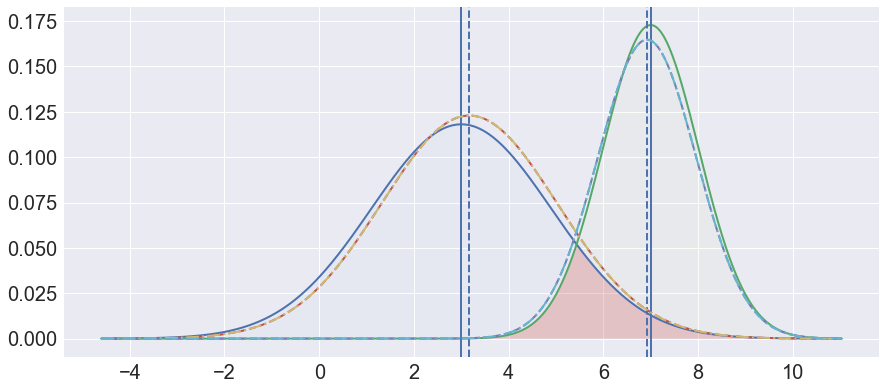

In [16]:
plot_bayes(to_draw=1000, mu=[3, 7], s=[1.9, 1.01], pi=[9, 7])

## Maximum likelihood
1. __binarne cechy__ $x_i\in\{0,1\}$
2. naiwne bayesowskie założenie o __niezależności cech pod warunkiem klasy__
$$p(x\mid C_k)=\prod_{d=1}^D\mu_{k,d}^{x_i}(1-\mu_{k,d})^{(1-x_i)}$$
3. logarytm __posterioru__ dla klasy $k$ $\ln\,p(x\mid C_k)p(C_k)$ daje dla przykładu $x$
$$\sum_{d=1}^D\left[x_i\ln\mu_{k,d}+(1-x_i)\ln(1-\mu_{k,d})\right]+\ln\,p(C_k)$$

## Regresja logistyczna revisited
1. __likelihood__ $$p(Y\mid\theta)=\prod_{n=1}^N\widehat{y}(x_n)^{\,y_n}(1-\widehat{y}(x_n))^{\,(1-y_n)}$$
2. __ujemny log likelihood__
$$L(\theta)=-\ln\,p(Y\mid\theta)=-\sum_{n=1}^N\left(y_n\ln\widehat{y}(x_n)+(1-y_n)\ln(1-\widehat{y}(x_n))\right)$$
daje funkcję błędu __entropii krzyżowej__ (_ang._ __cross entropy__) $L(\theta)$
3. metoda gradientowa daje metodę __poprawiania błędu__
$$\begin{align}
\nabla\,L(\theta)&=\sum_{n=1}^N\frac{\partial L}{\partial \widehat{y}(x_n)}\frac{\partial \widehat{y}(x_n)}{\partial z_n}\frac{\partial z_n}{\partial \theta}\\
&=\sum_{n=1}^N(\widehat{y}(x_n)-y_n)x_n
\end{align}$$
gdzie $$z_n=\theta^Tx_n\text{,}\hskip1em\widehat{y}(x_n)=\sigma(\theta^Tx_n),\hskip1em\text{oraz}\hskip1em\frac{d\sigma}{d{}z}=\sigma(1-\sigma)$$
co jest prawdziwe dla funkcji logistycznej $\sigma$
  * __identyczne__ poprawianie błędu jak przy metodzie najmniejszych kwadratów dla regresji
  * __może nadmiernie overfitować__
    * MLE maksymalizuje dla $\sigma()=0.5$
    * równoważne $\theta^Tx=0$
    * wielkość $\theta$ rośnie do nieskończoności
    * każde maksymalizujące rozwiązanie jest dobre
    * MLE ich nie rozróżnia
    * konieczne dodanie _prior_ jak w MAP
    * równoważnie dodanie regularyzacji

## Regresja logistyczna wieloklasowa
1. __softmax__ $$p(C_k\mid x)=y_k(x)=\frac{\exp(\theta_k^Tx)}{\sum_j\exp(\theta_j^Tx)}$$
2. __likelihood__ $$p(Y\mid\theta_1,\dots,\theta_K)=\prod_{n=1}^N\prod_{k=1}^Kp(C_k\mid x_n)y_{n,k}=\prod_{n=1}^N\prod_{k=1}^K\widehat{y}_{n,k}^{y_{n,k}}$$
  * $Y$ to macierz $N$ przykładów na $K$ kodowanych one-hot odpowiedzi
  * $\widehat{y}_{n,k}=\widehat{y}_k(x_n)$
3. __ujemny log likelihood__
$$\begin{align}
L(\theta_1,\dots,\theta_K)&=-\ln\,p(Y\mid\theta_1,\dots,\theta_K)\\
&=-\sum_{n=1}^N\sum_{k=1}^Ky_{nk}\ln\,\widehat{y}_k(x_n)
\end{align}$$
  * __entropia krzyżowa__
  * __metoda gradientowa__ metodą poprawiania błędu